In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<AxesSubplot:>

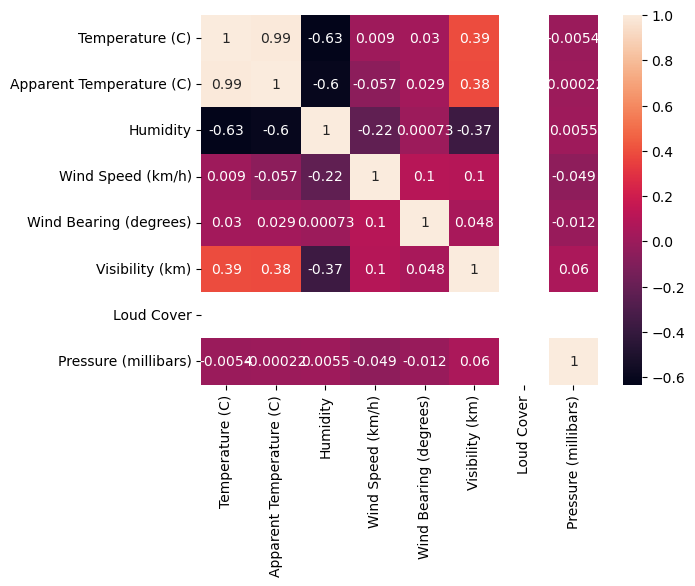

In [3]:
# Лабораторная работа №1. Построение линейной регрессионной модели

df = pd.read_csv('data_weather/weatherHistory.csv')
apparentTemperature = df["Apparent Temperature (C)"].to_numpy()
humidity = df["Humidity"].to_numpy()
windSpeed = df["Wind Speed (km/h)"].to_numpy()

sns.heatmap(df.corr(), cbar=True, annot=True)

Y = 35.08793283917145 + [-32.97447006] * X
R^2 = 0.36309180470630686
predict: [35.08793284  2.11346278]


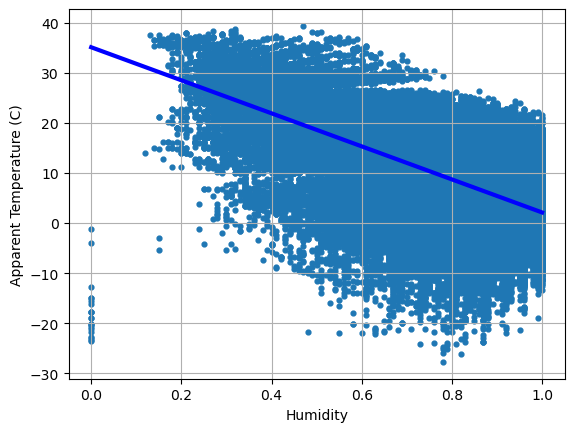

In [4]:
# Построение простой регрессионной модели

b = humidity.reshape((-1,1))
reg = LinearRegression().fit(b, apparentTemperature)
r = reg.score(b, apparentTemperature)
# print(reg.intercept_ , reg.coef_ , a)

print("Y =",reg.intercept_, "+" , reg.coef_, "* X")
print("R^2 =", r)
print('predict:', reg.predict(np.array([[0],[1]])))

xs = humidity
ys = apparentTemperature
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.plot([0,1], reg.predict(np.array([[0],[1]])), color="blue", linewidth=3)
plt.show()
# sns.regplot(x="Humidity", y="Apparent Temperature (C)", data=df)

Y = 40.30552179916654 + -0.31322508382079856 * X1 +  -35.466547722464334 * X2
R^2 = 0.40200116650916073
predict: [40.3055218   4.83897408]


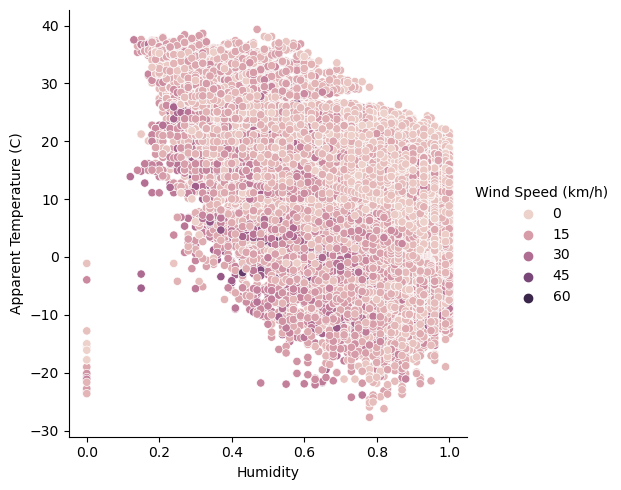

In [10]:
# Построение усложненной регрессионной модели

b = np.transpose([windSpeed, humidity])
reg = LinearRegression().fit(b, apparentTemperature)
r = reg.score(b, apparentTemperature)

print("Y =",reg.intercept_, "+" , reg.coef_[0], "* X1 +", reg.coef_[1], "* X2")
print("R^2 =", r)
# print('predict:', reg.predict([[0,0],[0,1]]))

sns.relplot(x="Humidity", y="Apparent Temperature (C)",hue="Wind Speed (km/h)", data=df)
# plt.plot([0,1], reg.predict([[0,0],[0,1]]), color="blue", linewidth=3)

Y = 35.0765007616517 + [-32.96154209] * X
R^2 = 0.36339967510668636


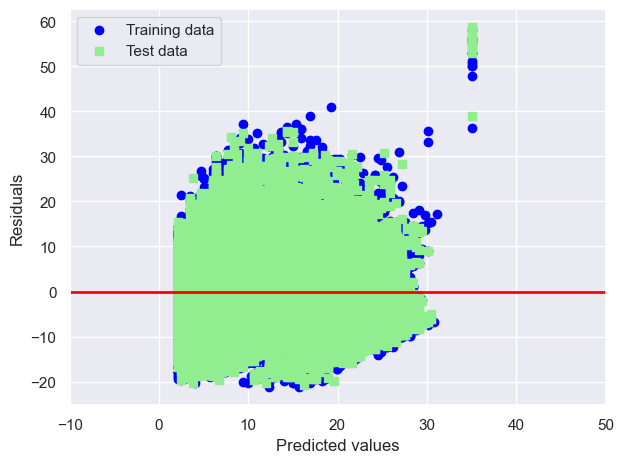

In [39]:
# Построение модели через train_test_split

X_train, X_test, y_train, y_test = train_test_split(humidity, apparentTemperature, test_size=0.33, random_state=0)

X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print("Y =",slr.intercept_, "+" , slr.coef_, "* X")
print("R^2 =", slr.score(X_test, y_test))

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

In [12]:
# Консольный тестовый стенд

if __name__ == '__main__':
    print("Предсказание ощущаемой температуры по влажности и скорости ветра")
    humidity = input("Введите влажность")
    try:
        humidity = float(humidity)
    except:
        humidity = float(input("Введите число"))
    
    windSpeed = input("Введите скорость ветра, либо оставьте пустым")
    if (windSpeed == ''):
        prediction = 35.08793283917145 - 32.97447006 * humidity
        print("Ощущаемая температура", prediction)
    else:
        try:
            windSpeed = float(windSpeed)
        except:
            windSpeed = float(input("Введите число"))
        prediction = 40.30552179916654 - 0.31322508382079856 * windSpeed - 35.466547722464334 * humidity
        print("Ощущаемая температура", prediction)

Предсказание ощущаемой температуры по влажности и скорости ветра
Ощущаемая температура 3.7787429086864606
